In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('MIclean.csv')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
labels = data.loc[:, 'FIBR_PREDS':'P_IM_STEN']
co_death = data['LET_IS']
feats = data.loc[:, 'AGE':'TRENT_S_n']

FIBR_PREDS  accuracy: 0.9058823529411765


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


PREDS_TAH  accuracy: 0.9911764705882353
JELUD_TAH  accuracy: 0.9735294117647059
FIBR_JELUD  accuracy: 0.95


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

A_V_BLOK  accuracy: 0.9647058823529412
OTEK_LANC  accuracy: 0.9264705882352942
RAZRIV  accuracy: 0.9705882352941176


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

DRESSLER  accuracy: 0.9647058823529412
ZSN  accuracy: 0.7294117647058823
REC_IM  accuracy: 0.9


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

P_IM_STEN  accuracy: 0.8941176470588236


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


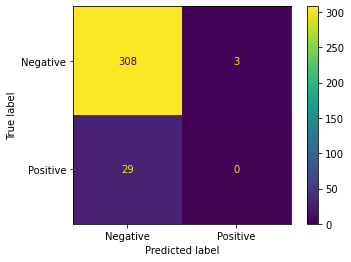

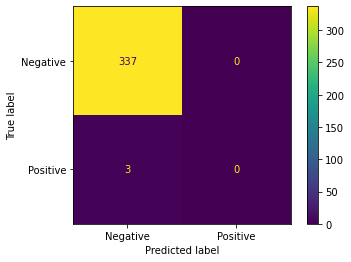

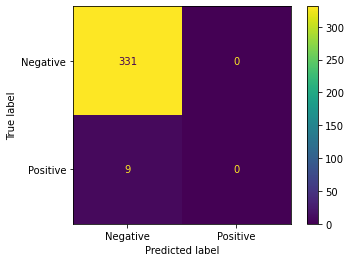

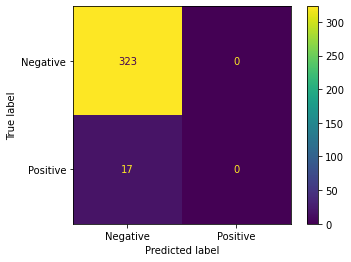

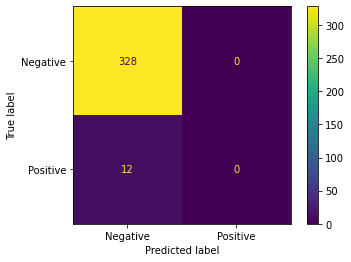

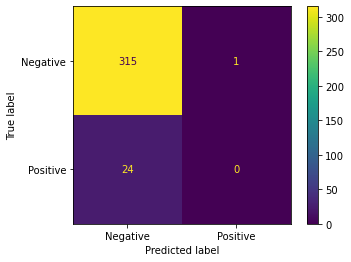

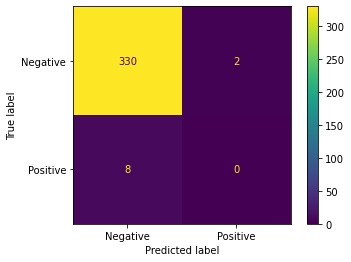

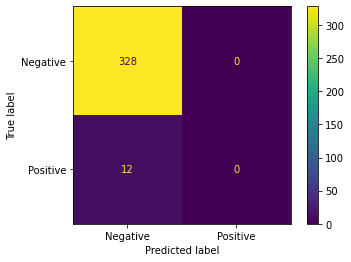

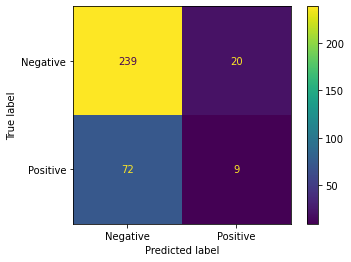

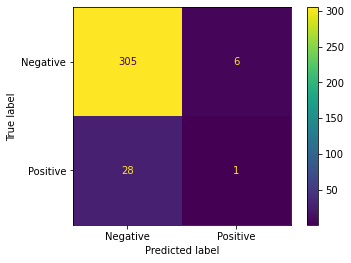

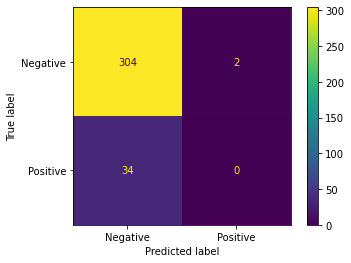

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

np.random.seed(20221102)

clf = KNeighborsClassifier()
for label in labels:
    train, test, tr_labels, t_labels = train_test_split(feats, data[label], test_size=0.2)
    clf.fit(train, tr_labels)
    print(label, ' accuracy:', accuracy_score(t_labels, clf.predict(test)))
    plot_confusion_matrix(clf, test, t_labels, display_labels = ['Negative', 'Positive'])

In [4]:
#Determine best value of k for K-Nearest
from sklearn.model_selection import cross_val_score

best_k = 0
best_score = 0
for k in range(1, 11):
    model_knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = list()
    for label in labels:
        results = cross_val_score(model_knn, feats, data[label], cv=10)
        cv_scores.append(results.mean())
    new_score = np.average(cv_scores)
    print('Average for ', k, ': ', new_score)
    if new_score > best_score:
        best_score = new_score
        best_k = k
print('Best k:', best_k)
print('Score:', best_score)

Average for  1 :  0.8818716577540108
Average for  2 :  0.9222459893048128
Average for  3 :  0.913850267379679
Average for  4 :  0.9253475935828877
Average for  5 :  0.9215508021390374
Average for  6 :  0.9262566844919785
Average for  7 :  0.9245989304812835
Average for  8 :  0.9269518716577541
Average for  9 :  0.925668449197861
Average for  10 :  0.926951871657754
Best k: 8
Score: 0.9269518716577541
